In [6]:
import pandas as pd
iris = pd.read_csv('https://sololearn.com/uploads/files/iris.csv')
iris.head()

,id,sepal_len,sepal_wd,petal_len,petal_wd,species
0,0,5.1,3.5,1.4,0.2,iris-setosa
1,1,4.9,3.0,1.4,0.2,iris-setosa
2,2,4.7,3.2,1.3,0.2,iris-setosa
3,3,4.6,3.1,1.5,0.2,iris-setosa
4,4,5.0,3.6,1.4,0.2,iris-setosa


In [7]:
iris.drop('id',axis=1,inplace=True) # first parameter is to select the column, axis 1 means the column, inplace True means the dataset is now changed if was False, it would be a temporary change

In [8]:
iris.describe()


,sepal_len,sepal_wd,petal_len,petal_wd
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris['species'].value_counts()
# iris.groupby('species').size()
# this shows that the data is balance as in each class equal instances are present

iris-setosa        50
iris-virginica     50
iris-versicolor    50
Name: species, dtype: int64

array([[<AxesSubplot:title={'center':'sepal_len'}>,
        <AxesSubplot:title={'center':'sepal_wd'}>],
       [<AxesSubplot:title={'center':'petal_len'}>,
        <AxesSubplot:title={'center':'petal_wd'}>]], dtype=object)

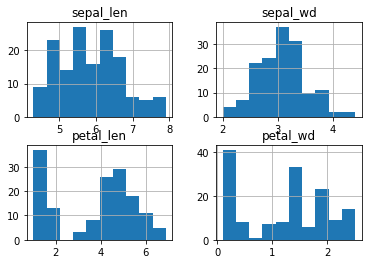

In [10]:
iris.hist()


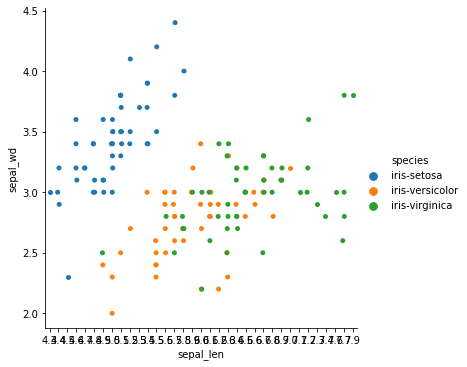

In [11]:
# multivariate plot with seaborn
import seaborn as sns
sns.catplot(data=iris,x='sepal_len',y='sepal_wd',hue='species')


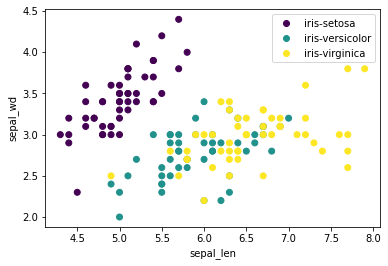

In [37]:
#multivariate plot with pyplot
import matplotlib.pyplot as plt
#integer coding:
inv_name_dict = {'iris-setosa': 0, 

  'iris-versicolor': 1,

  'iris-virginica': 2}

#building integer color code with 0/1/2:
colors = [inv_name_dict[species] for species in iris['species']]

#scatter plot:
scatter = plt.scatter(iris['sepal_len'],iris['sepal_wd'],c=colors)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wd')
plt.legend(handles=scatter.legend_elements()[0],labels = inv_name_dict.keys())
plt.show()


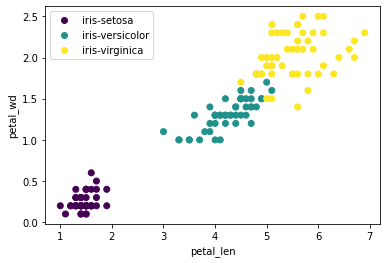

In [47]:
scatter2 = plt.scatter(iris['petal_len'],iris['petal_wd'],c=colors)
plt.xlabel('petal_len')
plt.ylabel('petal_wd')
plt.legend(handles=scatter2.legend_elements()[0], labels=inv_name_dict.keys())
plt.show()

In [53]:
# pd.plotting.scatter_matrix(iris,figsize=(10,10))[2][2]

In [68]:
X = iris[['petal_len','petal_wd']]
y = iris['species']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=12,stratify=y,test_size=0.3)


In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [132]:
y_pred = knn.predict(X_test)
print(knn.score(X_test,y_test))
y_pred_proba = knn.predict_proba(X_test)
print(y_pred[13:15])
print(y_pred_proba[13:15])
#probability divide into 3 categories, 1 is the max and total

0.9777777777777777
['iris-setosa' 'iris-versicolor']
[[1.  0.  0. ]
 [0.  0.8 0.2]]


In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred,labels=['iris-setosa','iris-versicolor','iris-virginica'])


array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]])

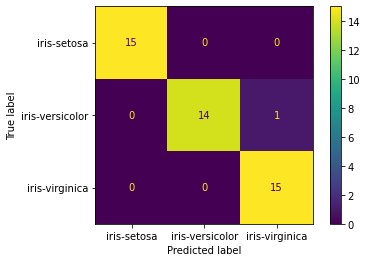

In [116]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test,labels=['iris-setosa','iris-versicolor','iris-virginica'])

In [122]:
from sklearn.model_selection import GridSearchCV
import numpy as np

grid_param = {
    'n_neighbors' : np.arange(2,10)
}
grids_search = GridSearchCV(knn,param_grid=grid_param,cv=5) #cv is K-fold cross validation

grids_search.fit(X,y)
grids_search.best_params_

{'n_neighbors': 4}

In [134]:
knn_final = KNeighborsClassifier(n_neighbors=4)
knn_final.fit(X,y)
knn_final.score(X,y)

0.9733333333333334

In [167]:
# knn_final.predict(np.array([3.76,1.20]))
knn_final.predict(np.array([3.78,1.8]).reshape(1,-1)) #new data

array(['iris-versicolor'], dtype=object)